In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, Lambda, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt



In [14]:
# a. Data preparation

corpus = [
    "I love deep learning",
    "Deep learning is a subset of machine learning",
    "I love machine learning",
    "Keras is a great tool for deep learning",
    "NLP is amazing",
    "I love NLP",
    "I enjoy learning new things",
    "Deep Learning is Fun"
]
corpus = [sentence.lower() for sentence in corpus]

# Tokenize the text (convert words to integers)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
# Get word-to-index mapping
word_index = tokenizer.word_index
word_index = {v: k for k, v in word_index.items()}
# Add 1 for the 'padding' token (index 0)
vocab_size = len(word_index) + 1
print(f"Vocabulary Size: {vocab_size}")
print(f"Word Index: {word_index}")

# Convert sentences to sequences of integers
sequences = tokenizer.texts_to_sequences(corpus)
print(f"\nSequences: {sequences}")

Vocabulary Size: 20
Word Index: {1: 'learning', 2: 'i', 3: 'deep', 4: 'is', 5: 'love', 6: 'a', 7: 'machine', 8: 'nlp', 9: 'subset', 10: 'of', 11: 'keras', 12: 'great', 13: 'tool', 14: 'for', 15: 'amazing', 16: 'enjoy', 17: 'new', 18: 'things', 19: 'fun'}

Sequences: [[2, 5, 3, 1], [3, 1, 4, 6, 9, 10, 7, 1], [2, 5, 7, 1], [11, 4, 6, 12, 13, 14, 3, 1], [8, 4, 15], [2, 5, 8], [2, 16, 1, 17, 18], [3, 1, 4, 19]]


In [15]:
#Generate training data
window_size = 2
data =[]

#CBOW pairs context -> target
for sentence in corpus:
  words = sentence.split()
  word_indices = [tokenizer.word_index[w] for w in words] # Use tokenizer to get word indices
  for i in range(window_size, len(word_indices) - window_size):
    context = [word_indices[i-2], word_indices[i-1], word_indices[i+1], word_indices[i+2]]
    target = word_indices[i]
    data.append((context, target))

print('Sample Training Data (cintext -> target)')
for c,t in data[:5]:
  print([word_index[i] for i in c], "->",word_index[t])
contexts = np.array([x[0] for x in data])
targets = np.array([x[1] for x in data])

Sample Training Data (cintext -> target)
['deep', 'learning', 'a', 'subset'] -> is
['learning', 'is', 'subset', 'of'] -> a
['is', 'a', 'of', 'machine'] -> subset
['a', 'subset', 'machine', 'learning'] -> of
['keras', 'is', 'great', 'tool'] -> a


In [16]:
# Train model

embedding_dim = 8
model =Sequential([
    Embedding(input_dim = vocab_size, output_dim = embedding_dim, input_length=4),
  Lambda(lambda x: tf.reduce_mean(x, axis=1)), #avg embeddings
  Dense(vocab_size, activation='softmax') #predict center word
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(contexts, targets, epochs=300, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Word Embeddings:
learning: [ 0.19670562  0.4807204   0.58508486 -0.16639191 -0.064018    0.52729505
 -0.4888522  -0.4161656 ]
i: [ 0.42886645  0.34459797 -0.354652   -0.32829118  0.35916477  0.3868377
  0.3478433  -0.3627754 ]
deep: [-0.43410248  0.45596284  0.558364   -0.43350175 -0.55135846  0.4918085
 -0.27481443 -0.03829103]
is: [ 0.3609362   0.4495115   0.08807616 -0.5959183   0.6873484   0.24416114
 -0.43407294 -0.27168056]
love: [ 0.04976814 -0.01023973 -0.03386085  0.04809621 -0.00418055 -0.02167599
  0.02429379  0.03217932]
a: [-0.16283736  0.60167396  0.3617065  -0.2893555   0.23122977  0.32905835
 -0.08397325  0.15007007]
machine: [ 0.4942538   0.44015485  0.53120637  0.03515837  0.50678766 -0.09628948
  0.4150047   0.54288745]
nlp: [ 0.00583652 -0.04698005 -0.00547203  0.04832736 -0.0220485   0.03986285
 -0.04858085 -0.04340934]
subset: [ 0.15624012  0.4782544   0.46607032 -0.07131315  0.16558143  0.5007978
 -0.329961   -0.32003218]
of: [ 0.4789208   0.38626212  0.5058838 

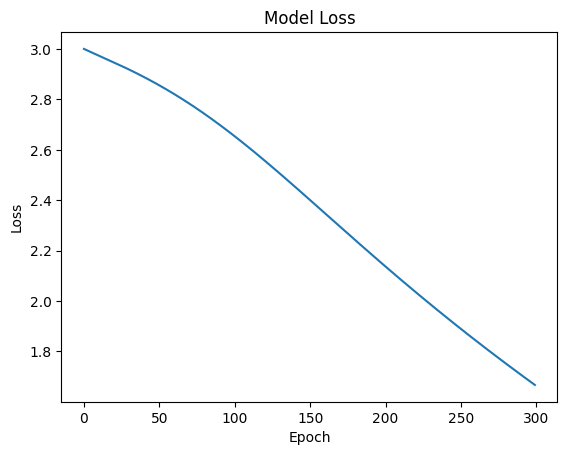

In [20]:
#Output
#Extract learned embeddings
embeddings = model.layers[0].get_weights()[0]

# Display embeddings for each word
print("\nWord Embeddings:")
# Iterate through the word_index dictionary which has integer indices as keys and words as values
for index, word in word_index.items():
    print(f"{word}: {embeddings[index]}")

#plot training loss
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [26]:
def predict_center(context_words):
    context_words = [w.lower() for w in context_words]
    # Use tokenizer.word_index to get integer indices from words
    context_ids = [tokenizer.word_index[w] for w in context_words]
    context_ids = np.array(context_ids).reshape(1,4)
    preds = model.predict(context_ids)
    predicted_word_id = np.argmax(preds[0])
    predicted_word = word_index[predicted_word_id]
    return predicted_word

In [27]:
test_context = ["I","love","learning","is"]
predicted_center = predict_center(test_context)
print(f"Predicted Center Word: {predicted_center}")
print("\nContext Words:" , test_context)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Center Word: a

Context Words: ['I', 'love', 'learning', 'is']
